In [32]:
#importing all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Model chosen: LSTM
Reason: 



In [33]:
#reading nvda dataset
NVDA_df = pd.read_csv("NVDA.csv")

In [34]:
NVDA_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-18,48.577499,48.904999,46.875000,47.622501,47.435326,30744000
1,2019-10-21,48.240002,49.137501,48.049999,49.002499,48.809891,26186800
2,2019-10-22,49.575001,50.632500,48.825001,48.902500,48.710289,32872000
3,2019-10-23,48.077499,48.915001,47.757500,48.772499,48.580807,27991600
4,2019-10-24,49.187500,49.552502,48.845001,49.215000,49.021557,23202000


In [35]:
#setting date as index for time series predicting
NVDA_df["Date"] = NVDA_df["Date"].astype("datetime64")
NVDA_df = NVDA_df.set_index("Date")

In [36]:
NVDA_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,115.180000,119.480003,115.169998,118.879997,118.879997,58077400
2022-10-18,123.440002,124.919998,116.180000,119.669998,119.669998,65936200
2022-10-19,118.790001,123.500000,118.339996,120.510002,120.510002,52313100
2022-10-20,121.129997,127.690002,121.050003,121.940002,121.940002,65239800
2022-10-21,120.980003,124.980003,118.870003,124.660004,124.660004,60893800


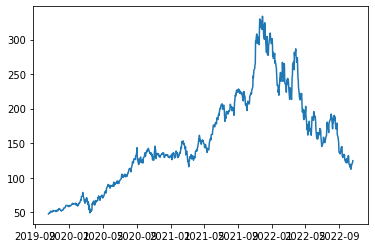

In [37]:
plt.plot(NVDA_df["Close"])

In [38]:
#selecting close as thats the only col we are interested in
data = NVDA_df[['Close']]
dataset = data.values

In [39]:
#scaler to scale values of close data (to help LSTM model converge faster)
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
scaled_data = scaler.fit_transform(dataset)

In [41]:
#training lstm on partial dataset
train_data = scaled_data[:680, :]

In [42]:
len(data)

759

In [43]:
#every set of 60 x values has 1 corresponding y value for the last day, this allows LSTM to look at last 60 days and predict the next day
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [44]:
#converting lists to numpy arrays (to reshape later)
x_train = np.array(x_train)
y_train = np.array(y_train) 

In [45]:
#reshaping for model to accept as input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(620, 60, 1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
620/620 [==============================] - 26s 37ms/step - loss: 0.0049
Epoch 2/5
620/620 [==============================] - 22s 35ms/step - loss: 0.0019
Epoch 3/5
620/620 [==============================] - 22s 35ms/step - loss: 0.0014
Epoch 4/5
620/620 [==============================] - 22s 36ms/step - loss: 0.0014
Epoch 5/5
620/620 [==============================] - 22s 36ms/step - loss: 0.0014


In [48]:
y_test = dataset[680:, :]
test_data = scaled_data[680 - 60: , :]
x_test_temp = []
x_test_temp.append(test_data[0:60,0])
x_test_temp = np.array(x_test_temp)
x_test = np.reshape(x_test_temp, (x_test_temp.shape[0], x_test_temp.shape[1], 1 ))
x_test_temp

array([[0.73981037, 0.6865493 , 0.67959458, 0.64153596, 0.59952817,
        0.58509453, 0.60952337, 0.5764973 , 0.59484512, 0.60934862,
        0.58432572, 0.53892795, 0.5155825 , 0.5291075 , 0.49017518,
        0.47713945, 0.52491373, 0.48175264, 0.5162116 , 0.51862303,
        0.54420511, 0.49213227, 0.48622601, 0.42594031, 0.44848191,
        0.41475689, 0.39885543, 0.45236117, 0.43691405, 0.4688218 ,
        0.42552095, 0.43202132, 0.41699357, 0.42412299, 0.39812149,
        0.42681401, 0.45742865, 0.49097897, 0.48612117, 0.47381938,
        0.51827353, 0.48779867, 0.49010527, 0.494998  , 0.48528239,
        0.46431345, 0.42677908, 0.38040277, 0.38700798, 0.41115722,
        0.37879513, 0.38854571, 0.4125202 , 0.40532087, 0.40060284,
        0.43209118, 0.42310951, 0.39211045, 0.37673319, 0.36334801]])

In [49]:
prediction = model.predict(x_test)
predictions = [prediction[0]]
for i in range(len(data) - 681):
  x_test_temp = np.append(x_test_temp[0][1:], prediction)
  x_test_temp = np.array([x_test_temp])
  x_test = np.reshape(x_test_temp, (x_test_temp.shape[0], x_test_temp.shape[1], 1 ))
  prediction = model.predict(x_test, verbose=0)
  predictions.append(prediction[0])
print(predictions)

# x_test_temp = np.append(x_test_temp[0][1:], prediction)
# x_test = np.reshape(x_test_temp, (x_test_temp.shape[0], x_test_temp.shape[1], 1 ))
# prediction = model.predict(x_test)
# prediction
# for i in range(60):
#   x_test_temp[0][1:].append(prediction)
#   x_test = np.reshape(x_test_temp, (x_test_temp.shape[0], x_test_temp.shape[1], 1 ))
#   prediction = model.predict(x_test)
# prediction = scaler.inverse_transform(prediction)

1/1 [==============================] - 1s 830ms/step
[array([0.4248105], dtype=float32), array([0.4434222], dtype=float32), array([0.4713256], dtype=float32), array([0.50330657], dtype=float32), array([0.53788656], dtype=float32), array([0.57446486], dtype=float32), array([0.61273247], dtype=float32), array([0.65253365], dtype=float32), array([0.6938168], dtype=float32), array([0.7366046], dtype=float32), array([0.7809723], dtype=float32), array([0.8270295], dtype=float32), array([0.8749063], dtype=float32), array([0.9247429], dtype=float32), array([0.9766805], dtype=float32), array([1.0308565], dtype=float32), array([1.0873979], dtype=float32), array([1.1464177], dtype=float32), array([1.2080096], dtype=float32), array([1.2722422], dtype=float32), array([1.3391544], dtype=float32), array([1.4087458], dtype=float32), array([1.4809707], dtype=float32), array([1.5557269], dtype=float32), array([1.632846], dtype=float32), array([1.712084], dtype=float32), array([1.7931099], dtype=float32)

In [50]:
#reverse the scaling to convert it back into actual numbers
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


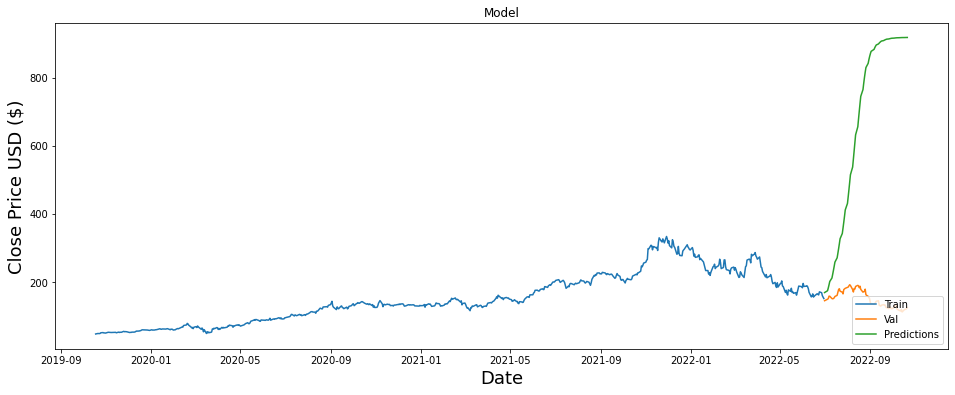

In [51]:
# Plot the data to compare performance, it seems to diverge a lot
train = data[:680]
valid = data[680:]

valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
# final_preds = predictions[-6:]
# final_preds

In [53]:
#rebuild and retrain model using full dataset
x_final = []
y_final = []

for i in range(60, len(scaled_data)):
    x_final.append(scaled_data[i-60:i, 0])
    y_final.append(scaled_data[i, 0])

x_final = np.array(x_final)
y_final = np.array(y_final) #
x_final = np.reshape(x_final, (x_final.shape[0], x_final.shape[1], 1 ))

# Build the LSTM model
model_final = Sequential()
model_final.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_final.add(LSTM(64, return_sequences=False))
model_final.add(Dense(25))
model_final.add(Dense(1))

model_final.compile(optimizer='adam', loss='mean_squared_error')

model_final.fit(x_final, y_final, batch_size=1, epochs=5)

Epoch 1/5
699/699 [==============================] - 28s 35ms/step - loss: 0.0036
Epoch 2/5
699/699 [==============================] - 25s 36ms/step - loss: 0.0017
Epoch 3/5
699/699 [==============================] - 25s 35ms/step - loss: 0.0013
Epoch 4/5
699/699 [==============================] - 24s 34ms/step - loss: 0.0011
Epoch 5/5
699/699 [==============================] - 24s 34ms/step - loss: 0.0011


In [54]:
#initializing necessary data and reshaping for model to take as input
x_final_temp = []
x_final_temp.append(scaled_data[-60:,0])
x_final_temp = np.array(x_final_temp)
x_final = np.reshape(x_final_temp, (x_final_temp.shape[0], x_final_temp.shape[1], 1 ))

In [55]:
prediction_final = model_final.predict(x_final)
predictions_final = [prediction_final[0]]
for i in range(10): #total of 10 trading days from 21st (the last day before data was downloaded), end on 4th Nov our last day of interest
  x_final_temp = np.append(x_final_temp[0][1:], prediction_final)
  x_final_temp = np.array([x_final_temp])
  x_final = np.reshape(x_final_temp, (x_final_temp.shape[0], x_final_temp.shape[1], 1 ))
  prediction_final = model_final.predict(x_final, verbose=0)
  predictions_final.append(prediction_final[0])
print(predictions_final)

predictions_final = scaler.inverse_transform(predictions_final)

1/1 [==============================] - 1s 834ms/step
[array([0.29602057], dtype=float32), array([0.31618723], dtype=float32), array([0.3386772], dtype=float32), array([0.36249405], dtype=float32), array([0.38741836], dtype=float32), array([0.4133389], dtype=float32), array([0.44018164], dtype=float32), array([0.46789506], dtype=float32), array([0.49644312], dtype=float32), array([0.52580106], dtype=float32), array([0.5559522], dtype=float32)]


In [56]:
#final predictions, seems more reasonable
predictions_final


array([[132.32508877],
       [138.09552815],
       [144.5307507 ],
       [151.34564591],
       [158.47742533],
       [165.89426411],
       [173.57497977],
       [181.50482816],
       [189.67349947],
       [198.07390728],
       [206.70127616]])

In [57]:
#select dates of interest
results = predictions_final[-10:]
dates = ['2022-10-24','2022-10-25','2022-10-26', '2022-10-27','2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04' ]

In [58]:
#save to submission df
to_submit = pd.DataFrame(results,  columns = ['Close'])
to_submit.rename_axis('Date', inplace=True)

In [59]:
#write to csv
to_submit.to_csv("Implementation_1.csv")